/tmp/ipykernel_650446/1784992436.py:125: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_650446/1784992436.py:125: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_650446/1784992436.py:125: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_650446/1784992436.py:125: UserWarning: Glyph 32534 (\N{CJK UNIFIED IDEOGRAPH-7F16}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_650446/1784992436.py:125: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_650446/1784992436.py:125: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_650446/1784992436.py:125: UserWarning: Glyph 34892 (\N{CJK UN

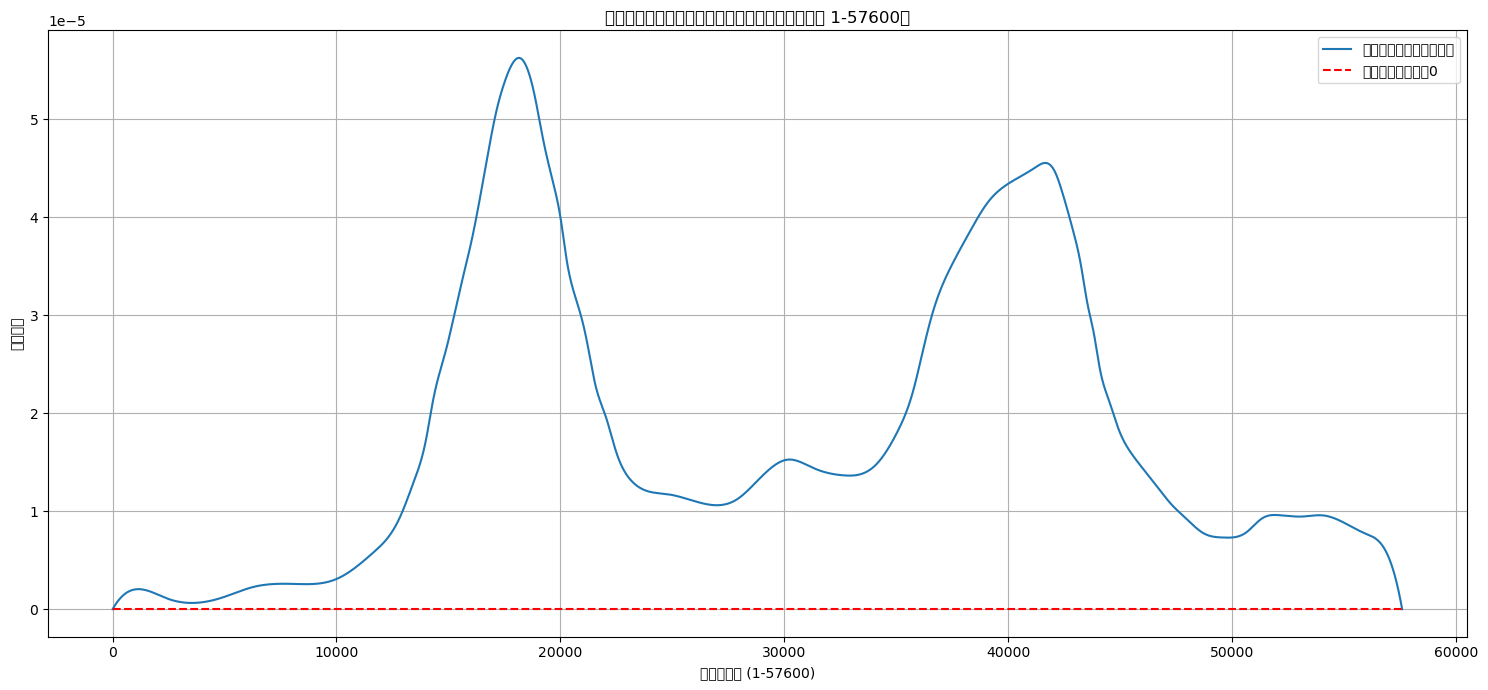

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import pandas as pd

# 原始数据 Source: NCHRP Report 365.
data = """
0.4897959183673466, 0.004999999999999977
1.020408163265306, 0.0026315789473684015
1.5510204081632653, 0.0015789473684210409
2.040816326530612, 0.0028947368421052555
2.6122448979591835, 0.005526315789473685
3.346938775510204, 0.006315789473684219
4.183673469387756, 0.007631578947368406
4.857142857142858, 0.014210526315789479
5.3265306122448965, 0.022368421052631565
5.612244897959183, 0.03210526315789475
5.836734693877551, 0.04263157894736841
5.959183673469386, 0.0518421052631579
6.204081632653061, 0.06473684210526315
6.448979591836734, 0.07894736842105263
6.693877551020407, 0.09289473684210525
6.959183673469388, 0.11184210526315788
7.142857142857142, 0.1244736842105263
7.285714285714285, 0.1313157894736842
7.591836734693878, 0.1376315789473684
7.857142857142856, 0.12815789473684208
8, 0.11815789473684209
8.183673469387754, 0.10736842105263157
8.346938775510203, 0.09684210526315788
8.448979591836734, 0.08736842105263157
8.63265306122449, 0.07710526315789473
8.816326530612244, 0.06763157894736842
8.979591836734693, 0.056315789473684194
9.183673469387754, 0.04789473684210527
9.36734693877551, 0.0394736842105263
9.653061224489795, 0.03210526315789475
10.346938775510203, 0.028684210526315784
10.938775510204081, 0.026578947368421035
11.612244897959183, 0.02736842105263157
12.061224489795917, 0.032894736842105254
12.571428571428571, 0.03736842105263158
13.040816326530612, 0.03526315789473683
13.612244897959183, 0.033421052631578935
14.183673469387752, 0.03578947368421051
14.612244897959183, 0.044473684210526304
14.897959183673468, 0.0544736842105263
15.102040816326529, 0.06578947368421052
15.26530612244898, 0.07421052631578946
15.591836734693878, 0.08526315789473683
15.938775510204081, 0.09394736842105263
16.285714285714285, 0.10157894736842105
16.73469387755102, 0.10684210526315789
17.163265306122447, 0.11026315789473683
17.53061224489796, 0.1094736842105263
17.6734693877551, 0.10421052631578946
17.877551020408163, 0.0944736842105263
18.020408163265305, 0.08605263157894735
18.142857142857142, 0.0763157894736842
18.26530612244898, 0.06868421052631578
18.36734693877551, 0.060526315789473664
18.551020408163264, 0.0518421052631579
18.714285714285715, 0.04526315789473684
18.959183673469386, 0.03894736842105262
19.24489795918367, 0.03394736842105264
19.489795918367346, 0.029736842105263145
19.71428571428571, 0.026052631578947355
19.959183673469386, 0.022894736842105246
20.30612244897959, 0.01894736842105263
20.6734693877551, 0.01789473684210527
21.10204081632653, 0.019210526315789456
21.387755102040817, 0.02263157894736842
21.755102040816325, 0.023421052631578954
22.163265306122447, 0.0231578947368421
22.53061224489796, 0.023421052631578954
22.959183673469386, 0.021315789473684205
23.306122448979593, 0.01894736842105263
23.591836734693878, 0.016578947368421026
"""

# 解析数据
times = []
proportions = []
for line in data.strip().split('\n'):
    t, p = line.split(',')
    times.append(float(t.strip()))
    proportions.append(float(p.strip()))

# 添加时间0和24，比例为0
times = [0.0] + times + [24.0]
proportions = [0.0] + proportions + [0.0]

times = np.array(times)
proportions = np.array(proportions)

# 创建样条插值
# 使用三阶样条插值，确保边界平滑
spline = make_interp_spline(times, proportions, k=3)

# 生成高分辨率的时间点
num_points = 57600
time_new = np.linspace(0, 24, num_points)
proportions_new = spline(time_new)

# 处理边界可能的负值或超出范围的值
# 由于插值可能会导致轻微的振荡，我们将确保所有比例值非负
proportions_new = np.clip(proportions_new, 0, None)

# 归一化处理，使总和为1
total = proportions_new.sum()
proportions_normalized = proportions_new / total

# 创建新的时间列，从1到57600
time_index = np.arange(1, num_points + 1)

# 可视化原始数据和平滑后的数据
plt.figure(figsize=(15, 7))
plt.plot(time_index, proportions_normalized, '-', label='平滑并归一化的插值数据')
plt.plot([1, num_points], [0, 0], 'r--', label='开始和结束设置为0')
plt.xlabel('数据点编号 (1-57600)')
plt.ylabel('出行比例')
plt.title('一天内出行量比例的平滑归一化插值（数据点编号 1-57600）')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 保存生成的数据到CSV文件
df = pd.DataFrame({
    'T': time_index,
    'Pro': proportions_normalized
})

df.to_csv('DiurnalTravelDistributions.csv', index=False)
